In [31]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading the data file and printing the first 10 columns
df = pd.read_csv("bezdekIris.data" , sep= "," , header=None , names=['sepal length','sepal width','petal length','petal width', 'class'])
print(df.head(10))

   sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


##### The MinMaxScaler is a data preprocessing tool provided by the sklearn (Scikit-learn) library in Python. It's used to normalize data by scaling the features to a specified range, typically between 0 and 1. This scaling is useful for machine learning algorithms that are sensitive to the magnitude of input features, such as gradient-based methods.

#### When to Use MinMaxScaler: 
##### Uniformly Distributed Data: When your data is uniformly distributed, the MinMaxScaler works well to ensure that all features contribute equally to the model.
##### Sensitive Algorithms: Algorithms like Support Vector Machines (SVM) or k-Nearest Neighbors (k-NN) are sensitive to the scale of the input data, so normalization is often necessary.

In [10]:
scaler = MinMaxScaler()
feature_names = ['sepal length','sepal width','petal length','petal width']
df_scaled = pd.DataFrame(scaler.fit_transform(df[feature_names]), columns= feature_names)
df_scaled.head(10)

,sepal length,sepal width,petal length,petal width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
5,0.305556,0.791667,0.118644,0.125000
6,0.083333,0.583333,0.067797,0.083333
7,0.194444,0.583333,0.084746,0.041667
8,0.027778,0.375000,0.067797,0.041667
9,0.166667,0.458333,0.084746,0.000000


### Visualise the Data

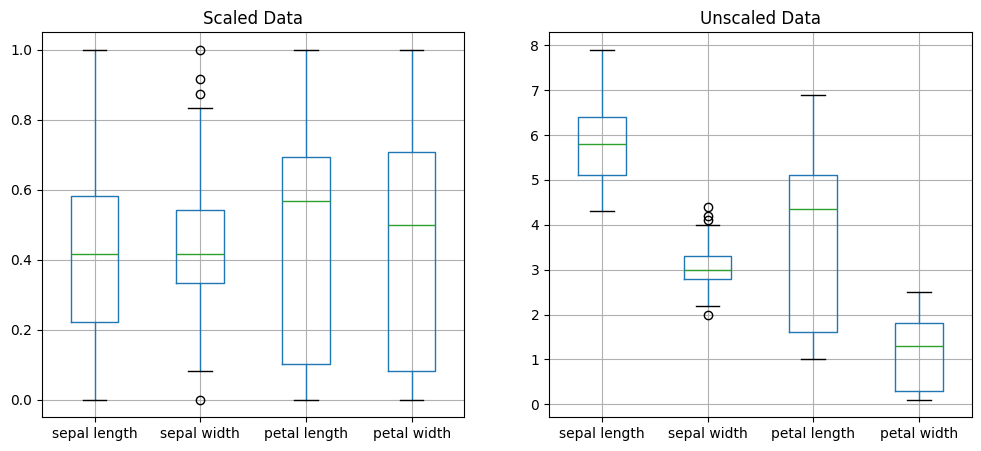

In [23]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
df_scaled.boxplot()
plt.title("Scaled Data")
plt.subplot(1,2,2)
df.boxplot()
plt.title("Unscaled Data")
plt.show()

### Calculating Statistical Values

In [26]:
mean = df_scaled.mean()
std = df_scaled.std()

print(f"""The mean value for the scaled iris data is:
{mean}

The standard deviation for the scaled data is:
{std} """)

The mean value for the scaled iris data is:
sepal length    0.428704
sepal width     0.440556
petal length    0.467458
petal width     0.458056
dtype: float64

The standard deviation for the scaled data is:
sepal length    0.230018
sepal width     0.181611
petal length    0.299203
petal width     0.317599
dtype: float64 


#### After the scaling with "MinMaxScaler()", the minimum value of all feature is equal to zero while max value is equal to. MinMaxScaler() changes its range. But the mean value and the standard deviation values are different because it depends on the statistical distribution of the feature values, which MinMaxScaler() does not make any changes. 

# PCA

#### Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms the data into a new coordinate system such that the greatest variance by any projection of the data comes to lie on the first principal component, the second greatest variance on the second component, and so on.

#### PCA helps in reducing the dimensionality of the data while retaining as much variance as possible, which is especially useful when dealing with high-dimensional datasets.

In [30]:
pca = PCA()
df_scaled_pca = pd.DataFrame(pca.fit_transform(df_scaled))
df_scaled_pca.columns = ['PC{}'.format(i+1) for i in df_scaled_pca.columns]
df_scaled_pca["class"] = df["class"]
df_scaled_pca.head(10)

,PC1,PC2,PC3,PC4,class
0,-0.630703,0.107578,-0.018719,-0.007307,Iris-setosa
1,-0.622905,-0.104260,-0.049142,-0.032359,Iris-setosa
2,-0.669520,-0.051417,0.019644,-0.007434,Iris-setosa
3,-0.654153,-0.102885,0.023219,0.020114,Iris-setosa
4,-0.648788,0.133488,0.015116,0.011786,Iris-setosa
5,-0.535273,0.289616,0.025438,0.000283,Iris-setosa
6,-0.656538,0.010724,0.091835,0.014878,Iris-setosa
7,-0.625780,0.057134,-0.014028,0.006980,Iris-setosa
8,-0.675644,-0.200703,0.035952,0.008903,Iris-setosa
9,-0.645645,-0.067208,-0.061706,0.009014,Iris-setosa


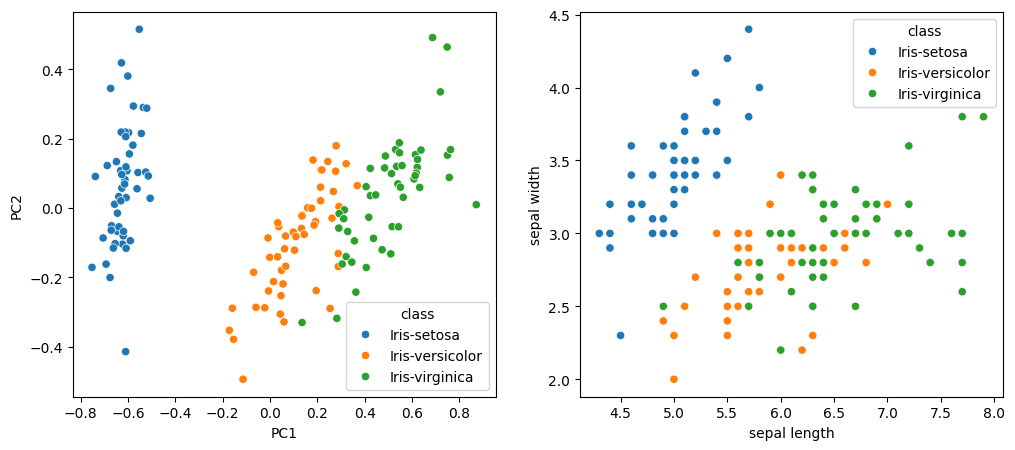

In [39]:
# Visualize the first two component
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(df_scaled_pca, x = "PC1" , y = "PC2", hue="class")
plt.subplot(1,2,2)
sns.scatterplot(df,x = "sepal length" , y = "sepal width", hue = "class")
plt.show()

#### As it can be easily seen that PCA made classification easier since now classes are more distinct from each other. 

#### Take a look at the variance that is explained by the principal components. To how many dimensions can the data set be reduced, if we want to be able to explain at least 90 % of the total variance?

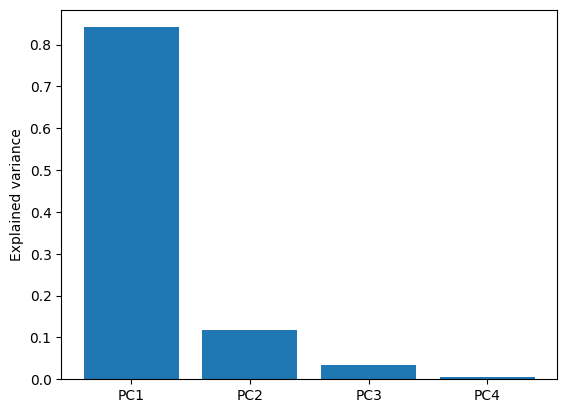

cumulated sum : [0.84136038 0.95887846 0.99361408 1.        ]


In [43]:
explained_var = pca.explained_variance_ratio_

plt.bar(range(1,len(explained_var) + 1), explained_var, tick_label=['PC1', 'PC2', 'PC3', 'PC4'])
plt.ylabel('Explained variance')
plt.show()
print("cumulated sum :" ,explained_var.cumsum())

#### The first two principal components already make up for more than 90 % of the total variance. As a result, the data set can be reduced to these two features for further analysis. The two other principal components only explain a small amount of the total variance.

In [44]:
# transformation matrix
transform_matrix = pd.DataFrame(abs(pca.components_), columns=feature_names)
transform_matrix = transform_matrix.set_index('PC{}'.format(i+1) for i in transform_matrix.index)
print(transform_matrix)

     sepal length  sepal width  petal length  petal width
PC1      0.424942     0.150748      0.616267     0.645689
PC2      0.423203     0.903967      0.060383     0.009839
PC3      0.713572     0.336316      0.065900     0.611035
PC4      0.362130     0.216818      0.782449     0.457849


#### From the transformation matrix, one can see that the first principal component is primarily made up of the petal width and the petal length of the flowers. By contrast, the second principal component is dominated by the sepal width. The sepal length contributes to both of the first two principal components equally.

## LDA